# CODE1

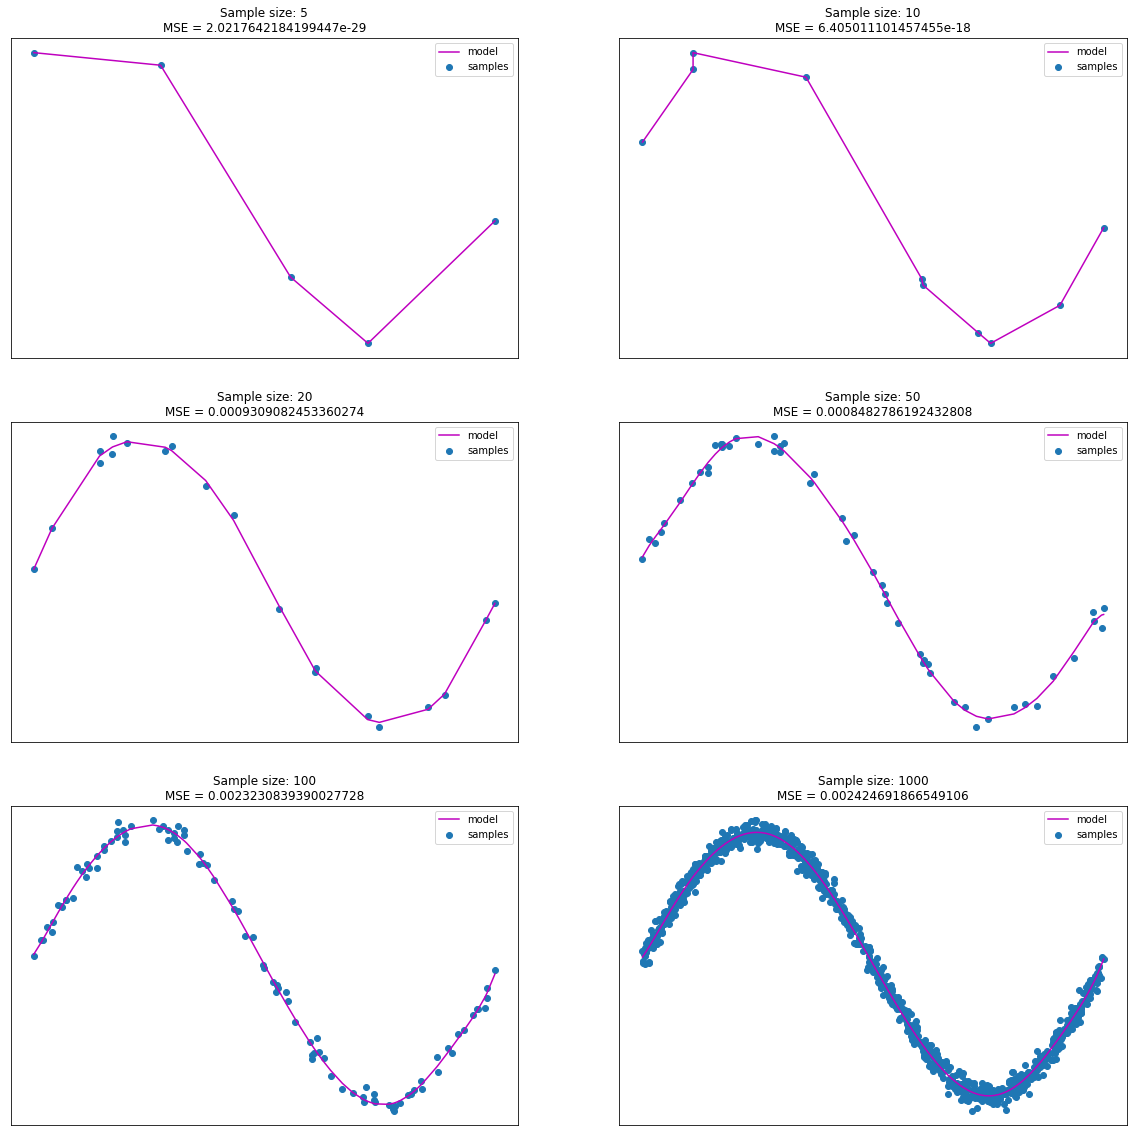

In [1]:
import operator
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

size = [5, 10, 20, 50, 100, 1000]

def ground_truth(X):
    return np.sin(2*np.pi*X)

plt.figure(figsize=(20, 20))

for i, k in enumerate(size):
    "Explain"
    
    ax = plt.subplot(3, 2, 1+i)
    plt.setp(ax, xticks=(), yticks=())
    
    np.random.seed(42)
    X = np.random.random(size = k)
    random_normal = np.random.normal(loc = 0, scale = 0.05, size = k)
    truth_func = ground_truth(X)
    y = random_normal + truth_func
    X = X[:, np.newaxis]
    y = y[:, np.newaxis]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    polynomial_features = PolynomialFeatures(degree=10)
    x_poly = polynomial_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    #Evaluation
    y_test_predicted = model.predict(polynomial_features.fit_transform(X_test))
    mse_test = mean_squared_error(y_test, y_test_predicted)
    
    plt.scatter(X, y, label='samples')
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
    X, y_poly_pred = zip(*sorted_zip)
    plt.plot(X, y_poly_pred, color='m', label = 'model')
    #plt.plot(X_true, ground_truth(X_true), label="True function") 
    plt.legend(loc="best")
    plt.title("Sample size: {}\nMSE = {}".format(k, mse_test))
plt.show()
    
    